In [179]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from itertools import product
from scipy.stats import gaussian_kde

In [8]:
df = pd.read_csv('/Users/jonniebarnsley/code/phd/Preprocessing/PPE_design.csv')
parameter_names = ['gamma0', 'UMV', 'LRP', 'PDDi', 'WeertC']
parameters = df[parameter_names]

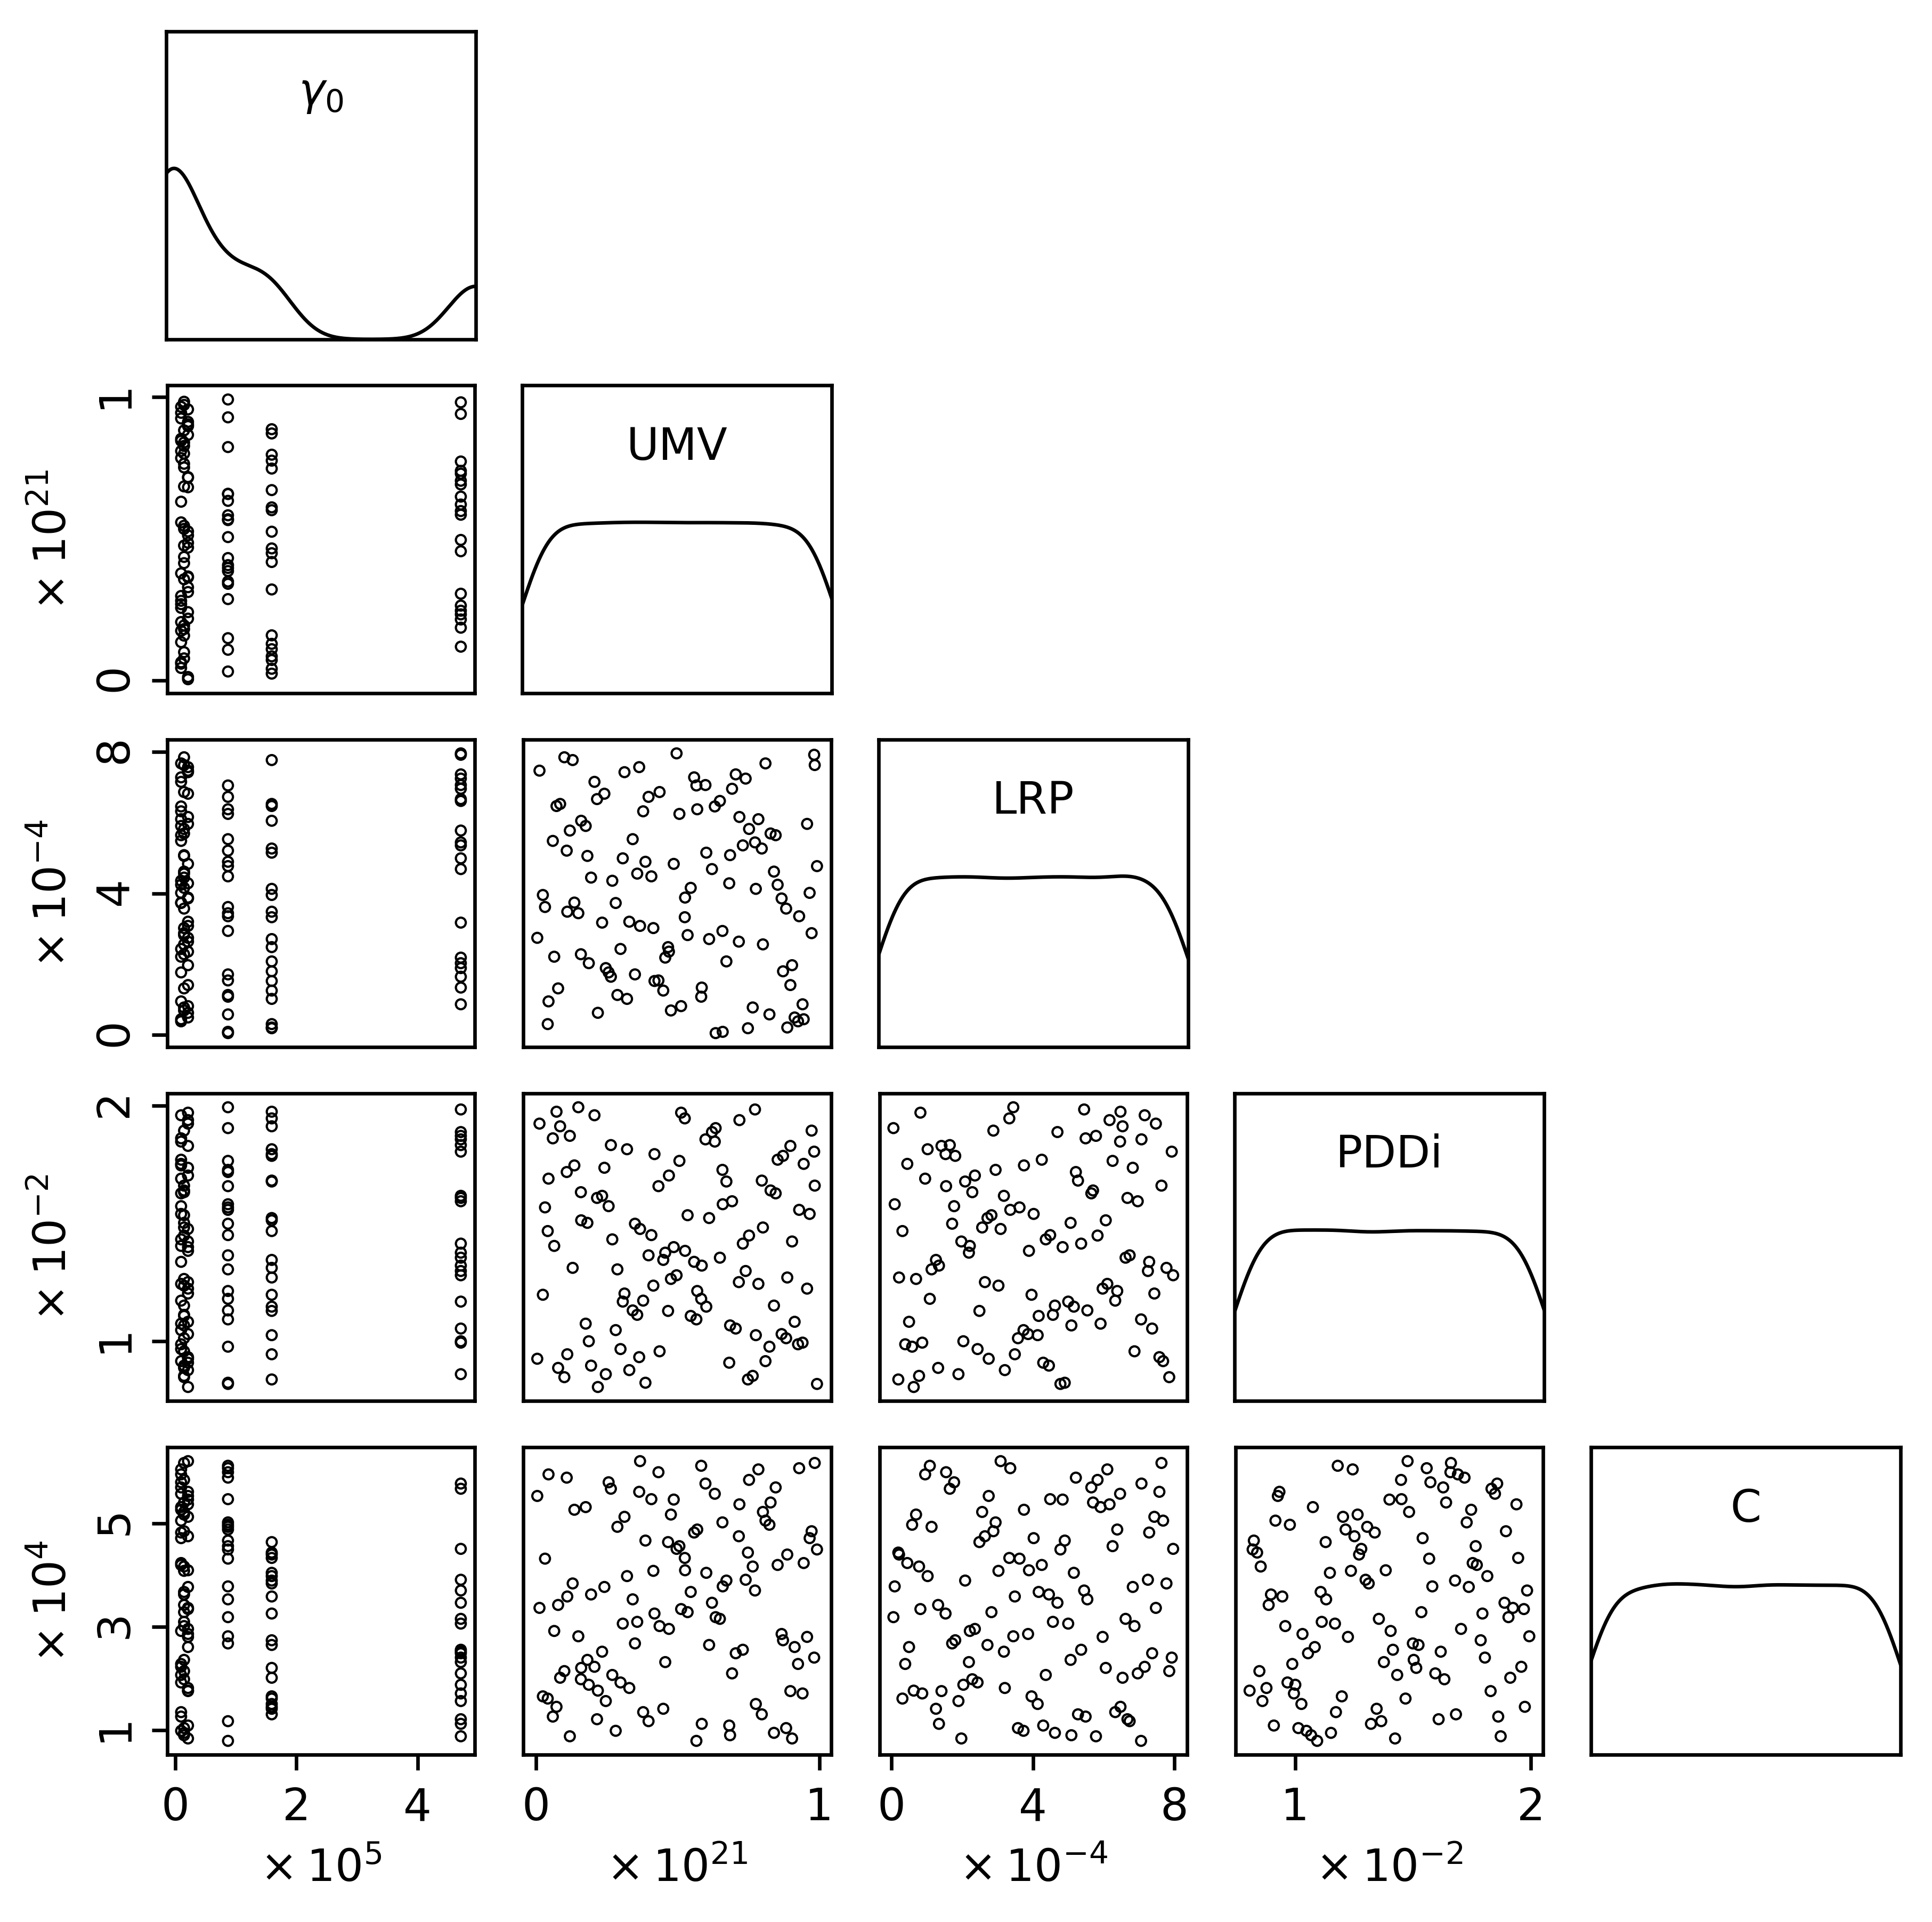

In [201]:
font = {
    'family' : 'sans-serif'
}
mpl.rc('font', **font)

N = len(parameters.columns)
fig, axes = plt.subplots(ncols=N, nrows=N, figsize=(7, 7), dpi=600)

ticks = {
    'gamma0'    : [0, 2e5, 4e5],
    'UMV'       : [0, 1e21],
    'LRP'       : [0, 4e-4, 8e-4],
    'PDDi'      : [1e-2, 2e-2],
    'WeertC'    : [1e4, 3e4, 5e4]
}

labels = ['$\gamma_0$', 'UMV', 'LRP', 'PDDi', 'C']

def get_sci_notation(ax, axis):

    if axis=='x':   
        m = max(ax.get_xticks())
    elif axis=='y':
        m = max(ax.get_yticks())

    exp = np.floor(np.log10(m)).astype(int)
    sci = f'$\\times \\: 10^{{{exp}}}$'

    return sci

for i, j in product(range(N), range(N)):

    ax = axes[i][j]
    x = parameters[parameters.columns[i]]
    y = parameters[parameters.columns[j]]

    if i<j:
        ax.set_axis_off()
        continue

    elif i==j:
        ax.set_xticks([])
        ax.set_yticks([])      
        kde = gaussian_kde(x, bw_method=0.25)
        xkde = np.linspace(min(x), max(x), 1000)
        ykde = kde(xkde)
        ymax = max(ykde)
        ax.plot(xkde, ykde, c='black', lw=0.8)
        ax.set_ylim((0, ymax*1.8))
        ax.set_xlim((min(x), max(x)))
        # if i == N-1:
        #     ax.set_xticks(ticks[parameters.columns[i]])
        ax.text(0.5, 0.8, labels[i], transform=ax.transAxes, ha='center', va='center')
        continue

    ax.scatter(y, x, s=5, edgecolors='black', facecolors='none', linewidths=0.5)

    if i<N-1:
        ax.set_xticks([])
    else:
        ax.set_xticks(ticks[parameters.columns[j]])
        ax.get_xaxis().get_offset_text().set_visible(False)
        ax.set_xlabel(get_sci_notation(ax, axis='x'))
    
    if j>0:
        ax.set_yticks([])
    else:
        ax.set_yticks(ticks[parameters.columns[i]])
        ax.get_yaxis().get_offset_text().set_visible(False)
        ax.set_ylabel(get_sci_notation(ax, axis='y'))
        ax.tick_params(axis='y', labelrotation=90)

#for ax in axes.flatten():
    ax.set_aspect(1/ax.get_data_ratio())
    ax.ticklabel_format(style='sci', scilimits=(-2,2))

fig.subplots_adjust(hspace=0.15, wspace=0.15)



In [214]:
from pairs import get_sci_notation
from pairs import pairs

TypeError: get_sci_notation() got an unexpected keyword argument 'axis'

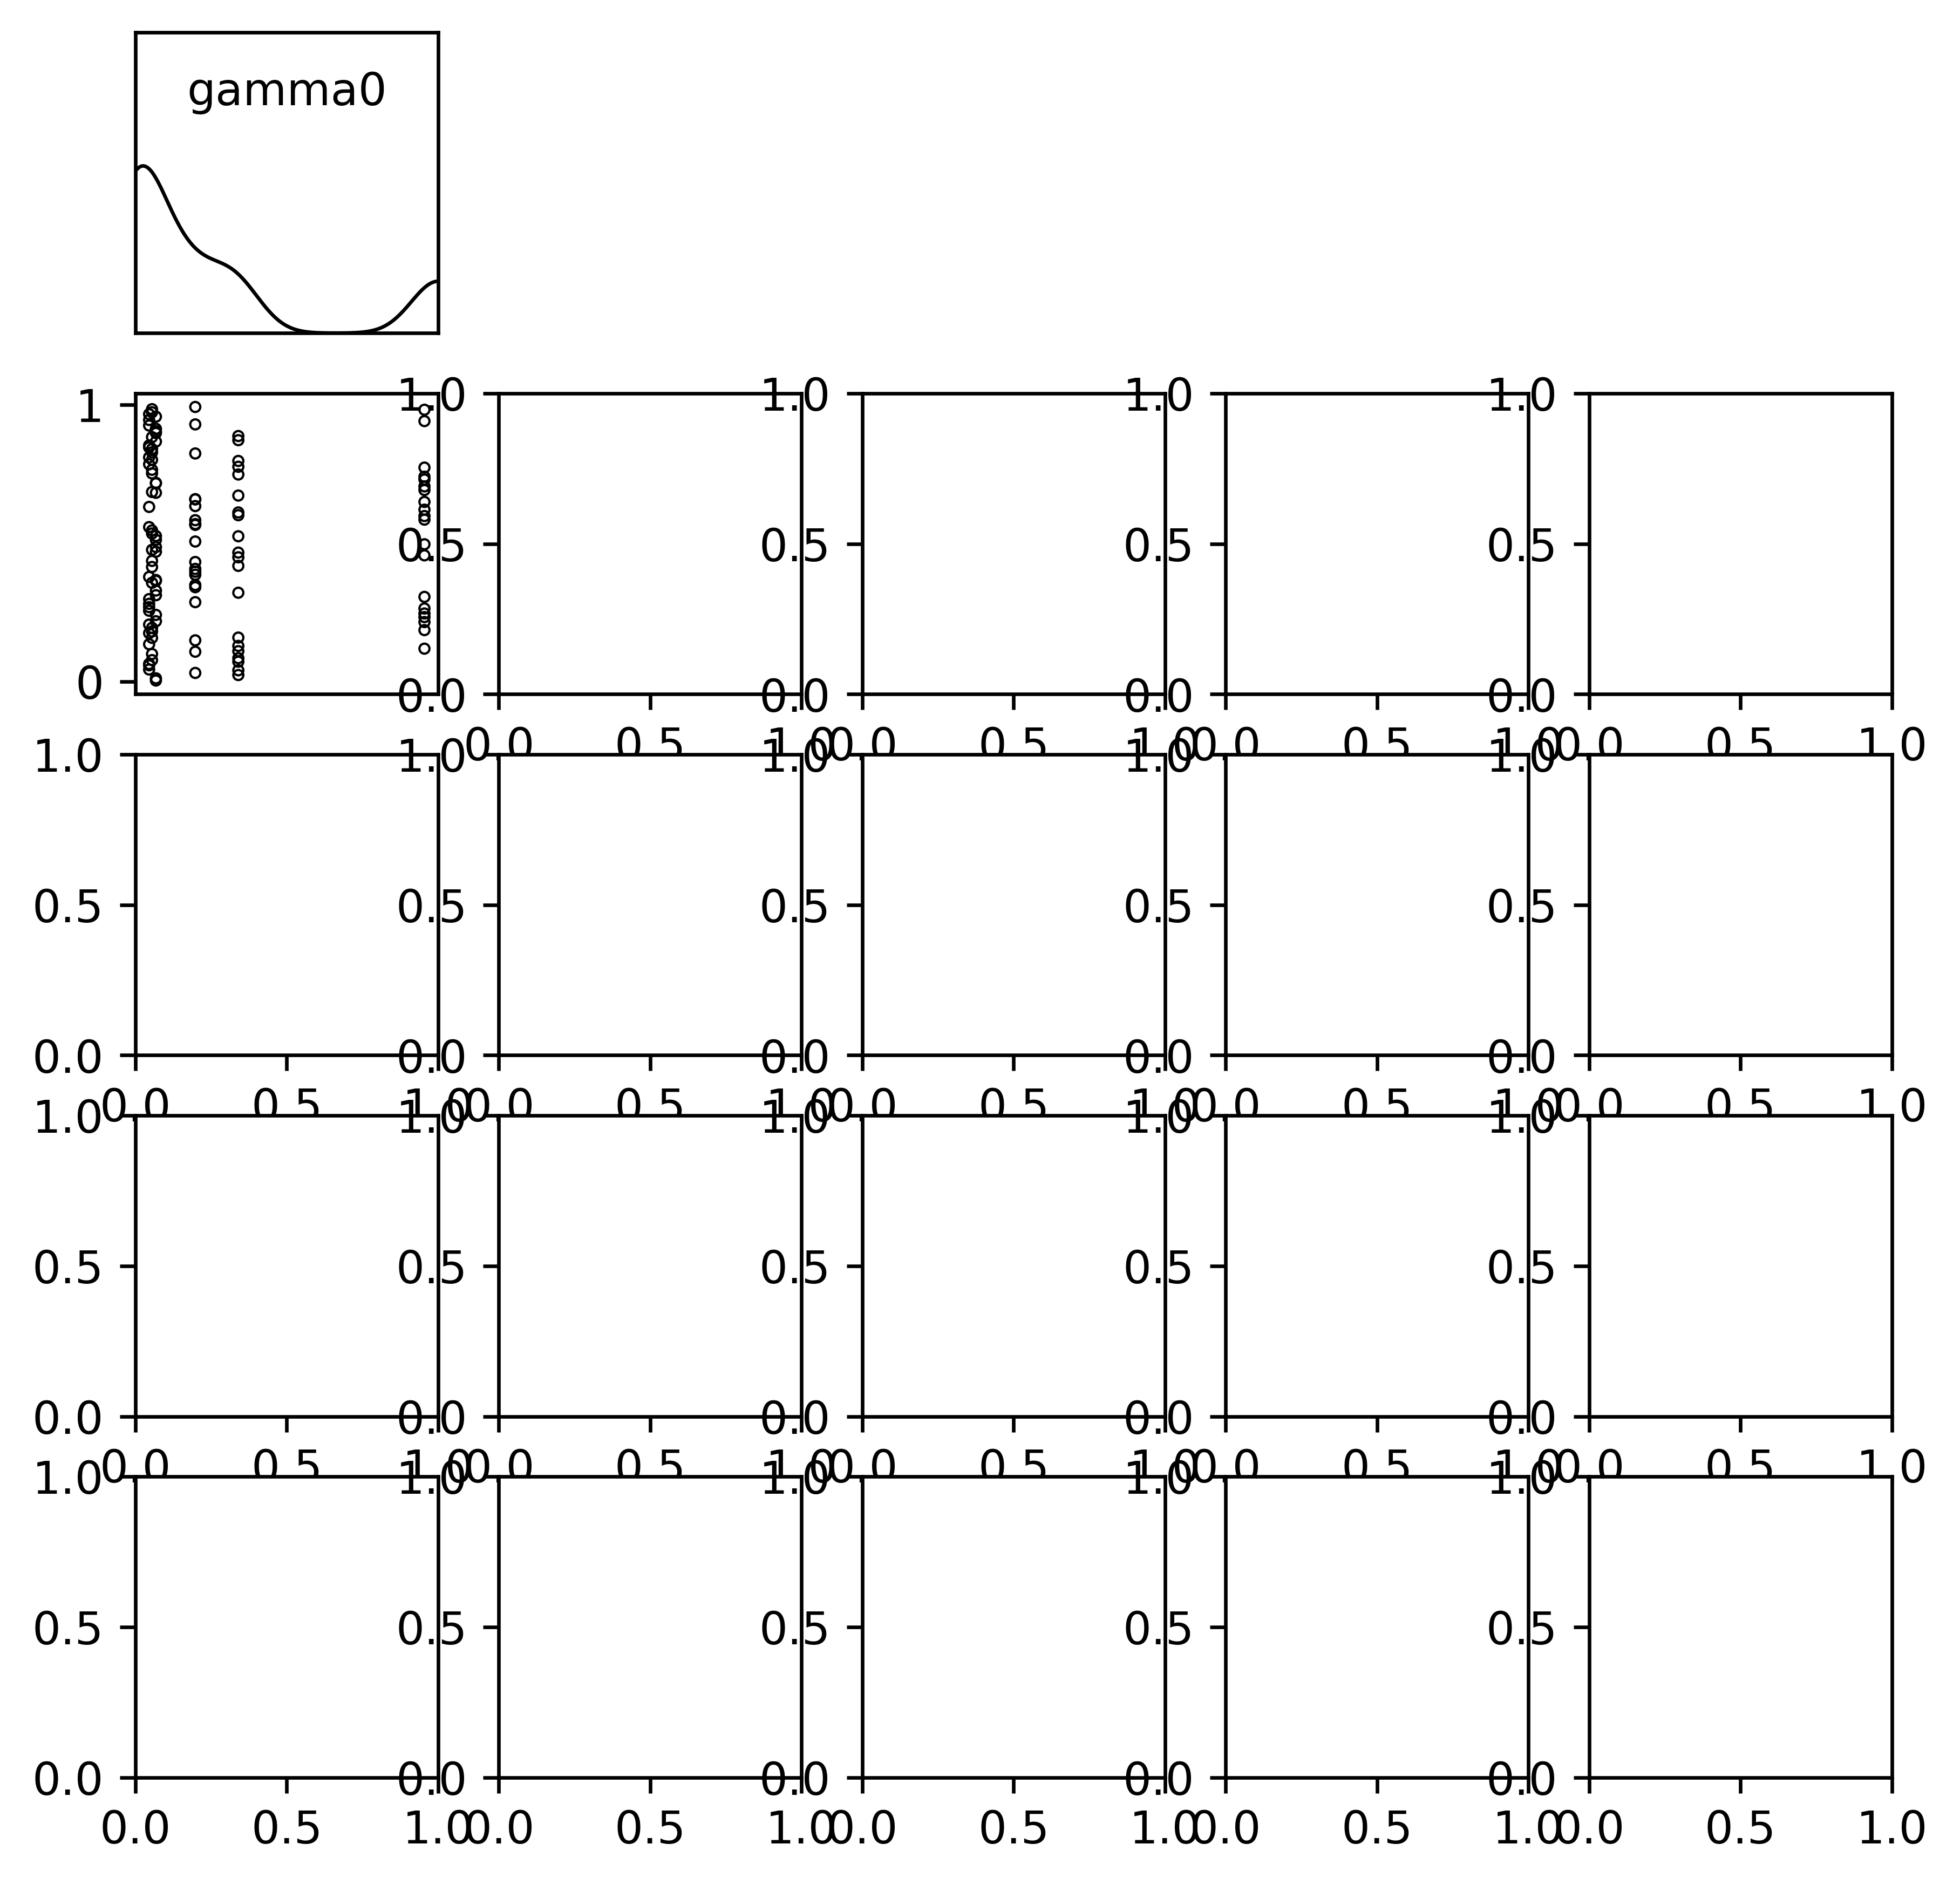

In [215]:
fig = pairs(parameters, ticks=ticks)